# Algoritmos de optimización - Reto 2

Nombre: Pablo Daniel Maiolo <br>
Github: https://github.com/pmaiolo/AlgoritmosOptimizacion.git/<br>

## Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

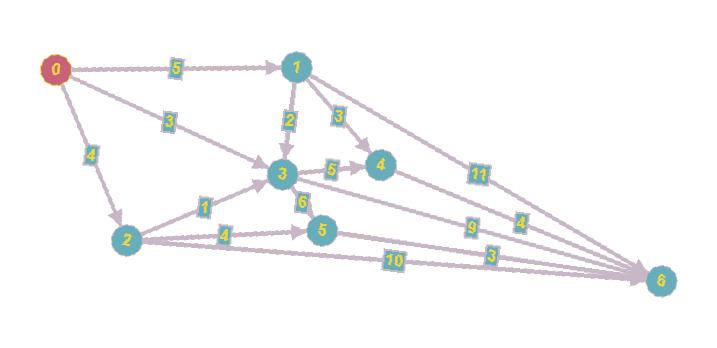

#Viaje por el rio - Programación dinámica
* Resuelve el problema del descenso por el rio utilizando la técnica de optimización que consideres más adecuada.

In [5]:
#Viaje por el rio - Programación dinámica
################################################################################

def viaje_por_el_rio():
    # Matriz de costos basada en la tabla
    inf = float('inf')
    costo = [
        [0, 5, 4, 3, inf, inf, inf],  # Costos desde 0
        [inf, 0, inf, 2, 3, inf, 11],  # Costos desde 1
        [inf, inf, 0, 1, inf, 4, 10],  # Costos desde 2
        [inf, inf, inf, 0, 5, 6, 9],  # Costos desde 3
        [inf, inf, inf, inf, 0, inf, 4],  # Costos desde 4
        [inf, inf, inf, inf, inf, 0, 3],  # Costos desde 5
        [inf, inf, inf, inf, inf, inf, 0]  # Costos desde 6
    ]

    n = len(costo)  # Número de nodos / filas
    dp = [float('inf')] * n  # Costo mínimo para llegar a cada nodo
    previo = [-1] * n  # Para reconstruir la ruta, arma la lista con -1
    dp[0] = 0  # Costo de inicio es 0 porque para llegar al 0 el costo es 0

    # Calcular el costo mínimo para cada nodo
    for j in range(1, n):
        for i in range(j):  # Solo revisamos nodos anteriores porque el río va de bajada
            if costo[i][j] != inf:  # Si hay conexión directa
                if dp[j] > dp[i] + costo[i][j]:
                    dp[j] = dp[i] + costo[i][j]
                    #print(f'nodo menor coste:{previo[j]}:i:{i}')
                    previo[j] = i

    # Reconstruir la ruta
    ruta = []
    actual = n - 1  # Nodo destino (6)
    while actual != -1:
        ruta.append(actual)
        #print(f'actual:{actual}')
        actual = previo[actual]
    ruta.reverse()

    return dp[n-1], ruta

def imprimir_resultado(costo_minimo, ruta):
    print(f"Costo mínimo desde 0 hasta 6: {costo_minimo}")
    #print("Ruta óptima:", " -> ".join(str(x) for x in ruta))
    print("Ruta óptima:", (str(x) for x in ruta))


# Ejecutar el programa
costo_minimo, ruta = viaje_por_el_rio()

#Imprimir el resultado
print(f'Ruta óptima: {ruta}')
print(f'Costo Mínimo: {costo_minimo}')

Ruta óptima: [0, 2, 5, 6]
Costo Mínimo: 11


## Descenso del gradiente

In [9]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc
import random

def calcular_gradiente(X):
    """
    Calcula el gradiente de la función f(x, y) = x^2 + y^2.
    Argumentos:
        X (numpy.array): Vector de coordenadas [x, y].
    Devuelve:
        numpy.array: Gradiente Gf(X) = [2x, 2y].
    """
    return 2 * X  # Multiplicación vectorial con NumPy

def calcular_funcion(X):
    """
    Evalúa la función f(x, y) = x^2 + y^2.
    Argumentos:
        X (numpy.array): Vector de coordenadas [x, y].
    Devuelve:
        float: Valor de la función en el punto dado.
    """
    return np.sum(X**2)  # Equivalente a X[0]**2 + X[1]**2

def gradiente_descendente(punto_inicial, tasa_aprendizaje=0.1, max_iteraciones=200):
    """
    Implementa el descenso de gradiente para minimizar f(x, y) = x^2 + y^2.

    Argumentos:
        punto_inicial (numpy.array): Punto inicial [x, y] desde donde empezar.
        tasa_aprendizaje (float): Tasa de aprendizaje.
        max_iteraciones (int): Número máximo de iteraciones.

    Returns:
        numpy.array: Punto óptimo encontrado [x, y].
    """
    X = np.array(punto_inicial)  # Convertimos el punto inicial a un array NumPy

    for _ in range(max_iteraciones):
        grad = calcular_gradiente(X)  # Calculamos el gradiente en el punto actual
        X = X - tasa_aprendizaje * grad  # Actualizamos el punto

    return X  # Retornamos el punto óptimo

# Generamos un punto inicial aleatorio
punto_inicial = np.array([random.uniform(-10, 15), random.uniform(-10, 15)])

print(f"Punto inicial aleatorio: {punto_inicial}")

# Ejecutar descenso de gradiente
punto_optimo = gradiente_descendente(punto_inicial, tasa_aprendizaje=0.04)

# Imprimir resultados
print(f"Punto óptimo encontrado: {punto_optimo}")
print(f"Valor de la función en el óptimo (x^2 + y^2): {calcular_funcion(punto_optimo)}")

Punto inicial aleatorio: [ 0.03749536 13.11724277]
Punto óptimo encontrado: [2.14557127e-09 7.50599076e-07]
Valor de la función en el óptimo (x^2 + y^2): 5.634035765829777e-13


Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [11]:
#Definimos la funcion
#Paraboloide
f  = lambda X:  X[0]**2 + X[1]**2        #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         # Gradiente  G-f(X) = [2x, 2y]

result = df([1,2])
print(result)
# fin enunciado
# Parámetros del Descenso del Gradiente
alpha = 0.05  # Tasa de aprendizaje
rango_iteración = 50 # cada cuanto quiero imprimir iteraciones para ver evolución
X = [random.uniform(-5, 5), random.uniform(-5, 5)]  # Punto inicial aleatorio
num_iter = 200  # Número de iteraciones

# Algoritmo de Descenso del Gradiente utilizando el enunciado
for i in range(num_iter):
    grad = df(X)  # Calculamos el gradiente en X
    X = [X[0] - alpha * grad[0], X[1] - alpha * grad[1]]  # Actualizamos X

    # Agregamos una impresión para ver la evolución de X y f(X)
    nX = np.array(X)
    if i % rango_iteración == 0 or i == num_iter - 1:
      print(f"Iteración {i+1}: X = {X}, f(X) = {f(X)}")

# Imprimimos resultado con función lambda
print(f"\n Valor final después de {num_iter} iteraciones: X = {X}, f(X) = {f(X)}")

# Podemos probarlo también con la función que hicimos arriba
resu = gradiente_descendente(X, alpha, num_iter)
print(f"\n Valor final ejercicio anterior : X = {X}, f(X) = {f(X)}")

[2, 4]
Iteración 1: X = [-1.1604023159386379, -0.4258261684554279], f(X) = 1.5278614605771847
Iteración 51: X = [-0.005980452686401388, -0.0021946123496137016], f(X) = 4.058213769936255e-05
Iteración 101: X = [-3.082190878372644e-05, -1.1310538717117628e-05], f(X) = 1.07791834714377e-09
Iteración 151: X = [-1.5884918933185133e-07, -5.829197402171507e-08], f(X) = 2.8631019186734654e-14
Iteración 200: X = [-9.096366818682157e-10, -3.3380414499873703e-10], f(X) = 9.388641002185553e-19

 Valor final después de 200 iteraciones: X = [-9.096366818682157e-10, -3.3380414499873703e-10], f(X) = 9.388641002185553e-19

 Valor final ejercicio anterior : X = [-9.096366818682157e-10, -3.3380414499873703e-10], f(X) = 9.388641002185553e-19


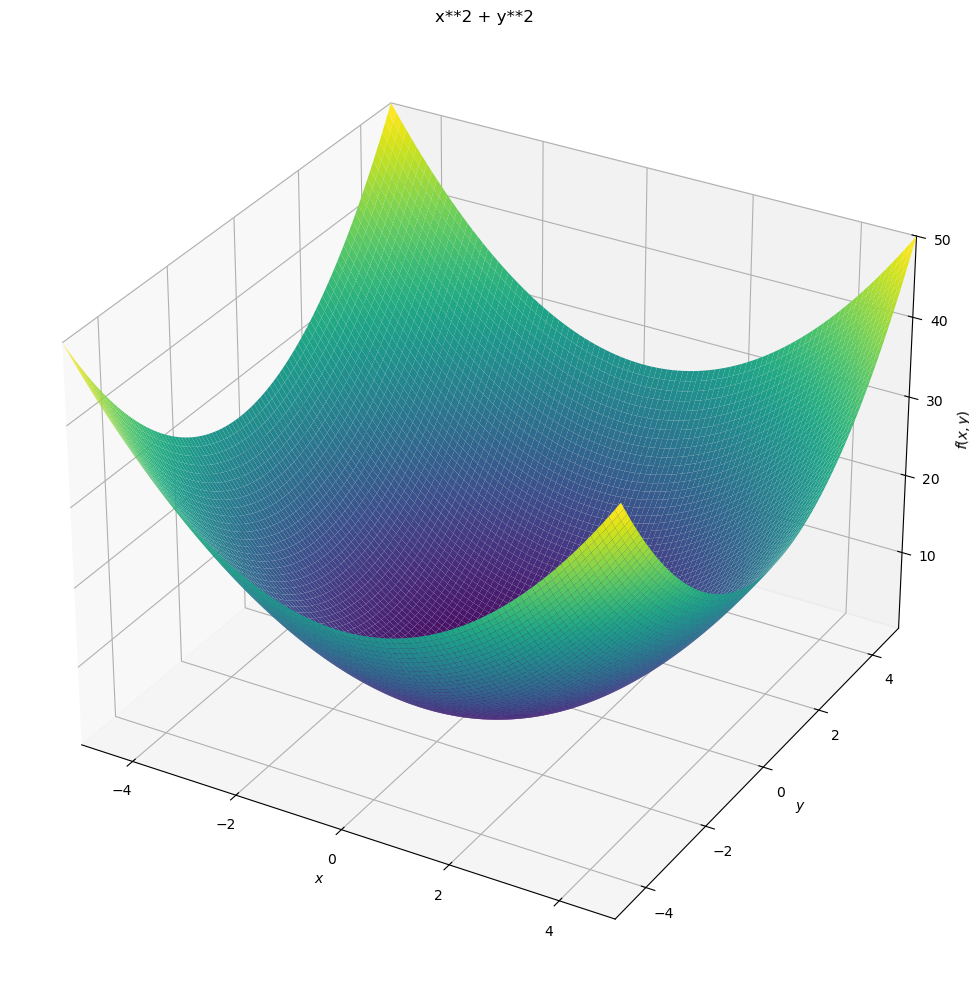

In [13]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

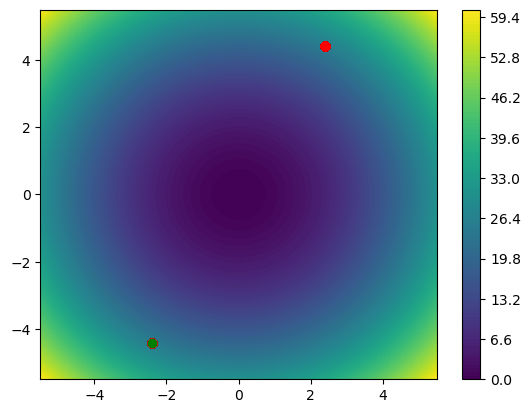

Solucion: [-2.3998784599602594, -4.407283616653475] 25.183565500203358


In [15]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=1

#Iteraciones:50
for _ in range(1000):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


## Reto

Optimizar la función siguiente mediante el algoritmo por descenso del gradiente.

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
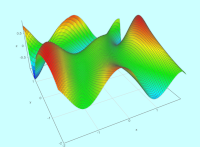


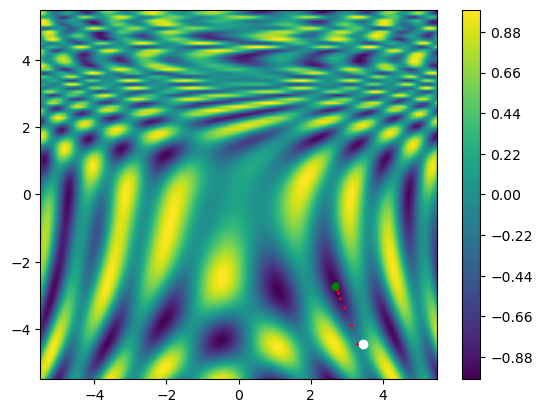

Solución encontrada: [ 2.67420429 -2.73005509] f(X) = -0.9999999999593725


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import random


#Definimos la funcion
import math
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )

# Definimos el Gradiente Gf(x, y)
def df(X):
    x, y = X
    A = (1/2 * x**2 - 1/4 * y**2 + 3)
    B = (2*x + 1 - math.exp(y))

    # Hacemos las derivadas parciales
    df_x = math.cos(A) * math.cos(B) * x - 2 * math.sin(A) * math.sin(B)
    df_y = -1/2 * y * math.cos(A) * math.cos(B) - math.exp(y) * math.sin(A) * math.sin(B)

    return np.array([df_x, df_y])

# Parámetros de visualización similares a los anteriores
resolucion = 100
rango = 5.5
X_vals = np.linspace(-rango, rango, resolucion)
Y_vals = np.linspace(-rango, rango, resolucion)


Z = np.zeros((resolucion, resolucion))

# Generamos los valores de la función en la malla
for ix, x in enumerate(X_vals):
    for iy, y in enumerate(Y_vals):
        Z[iy, ix] = f([x, y])

# Pintamos el mapa de niveles de Z Acá también se podría vectorizar la malla.
plt.contourf(X_vals, Y_vals, Z, resolucion)
plt.colorbar()

# Generamos un punto inicial aleatorio
P = np.array([random.uniform(-5, 5), random.uniform(-5, 5)])
plt.plot(P[0], P[1], "o", c="white")  # Punto inicial en blanco

# Parámetros del Descenso del Gradiente
TA = 0.1  # Tasa de aprendizaje inicial
num_iter = 1000  # Iteraciones

# Descenso del Gradiente
for i in range(num_iter):
    grad = df(P)

    # Actualizamos la posición
    P = P - TA * grad

    # Reducimos la tasa de aprendizaje progresivamente para estabilidad
    TA = TA * 0.995 if TA > 0.001 else TA

    # Dibujamos la trayectoria en rojo cada 10 iteraciones
    if i % 10 == 0:
        plt.plot(P[0], P[1], "o", c="red", markersize=1)

# Dibujamos el punto final en verde
plt.plot(P[0], P[1], "o", c="green", markersize=5)
plt.show()

print("Solución encontrada:", P, "f(X) =", f(P))